In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/Pima Indians/diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 수치형 변수를 범주형 변수로 만들기

In [9]:
df['Pregnancies_high'] = df['Pregnancies'] > 6
df[['Pregnancies', 'Pregnancies_high']]

,Pregnancies,Pregnancies_high
0,6,False
1,1,False
2,8,True
3,1,False
4,0,False
...,...,...
763,10,True
764,2,False
765,5,False
766,1,False


In [10]:
split_count = int(df.shape[0]*0.8)
split_count

614

In [11]:
train = df[:split_count].copy()
train.shape

(614, 10)

In [12]:
test = df[split_count:].copy()
test.shape

(154, 10)

In [15]:
feature_names = train.columns.tolist()
feature_names.remove("Pregnancies")
feature_names.remove('Outcome')
feature_names

['Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Pregnancies_high']

In [17]:
label_name = 'Outcome'
label_name

'Outcome'

In [18]:
X_train = train[feature_names]
print(X_train.shape)
X_train.head()

(614, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
0,148,72,35,0,33.6,0.627,50,False
1,85,66,29,0,26.6,0.351,31,False
2,183,64,0,0,23.3,0.672,32,True
3,89,66,23,94,28.1,0.167,21,False
4,137,40,35,168,43.1,2.288,33,False


In [19]:
y_train = train[label_name]
print(y_train.shape)
y_train.head()

(614,)


0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [20]:
X_test = test[feature_names]
print(X_test.shape)
X_test.head()

(154, 8)


,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies_high
614,138,74,26,144,36.1,0.557,50,True
615,106,72,0,0,25.8,0.207,27,False
616,117,96,0,0,28.7,0.157,30,False
617,68,62,13,15,20.1,0.257,23,False
618,112,82,24,0,28.2,1.282,50,True


In [21]:
y_test = test[label_name]
print(y_test.shape)
y_test.head()

(154,)


614    1
615    0
616    0
617    0
618    1
Name: Outcome, dtype: int64

In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model

DecisionTreeClassifier()

In [23]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_predict = model.predict(X_test)
y_predict[:5]

array([1, 0, 1, 0, 1], dtype=int64)

[Text(191.35938269704434, 211.04470588235293, 'Glucose <= 154.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(64.61753386699507, 198.25411764705882, 'BMI <= 26.35\ngini = 0.385\nsamples = 518\nvalue = [383, 135]'),
 Text(13.19408866995074, 185.4635294117647, 'Glucose <= 124.5\ngini = 0.061\nsamples = 128\nvalue = [124, 4]'),
 Text(6.59704433497537, 172.6729411764706, 'DiabetesPedigreeFunction <= 0.675\ngini = 0.019\nsamples = 105\nvalue = [104, 1]'),
 Text(3.298522167487685, 159.88235294117646, 'gini = 0.0\nsamples = 87\nvalue = [87, 0]'),
 Text(9.895566502463055, 159.88235294117646, 'DiabetesPedigreeFunction <= 0.705\ngini = 0.105\nsamples = 18\nvalue = [17, 1]'),
 Text(6.59704433497537, 147.09176470588235, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(13.19408866995074, 147.09176470588235, 'gini = 0.0\nsamples = 17\nvalue = [17, 0]'),
 Text(19.79113300492611, 172.6729411764706, 'BMI <= 9.8\ngini = 0.227\nsamples = 23\nvalue = [20, 3]'),
 Text(16.492610837438423, 159.8

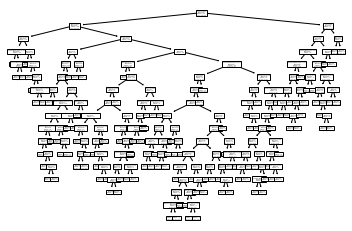

In [25]:
from sklearn.tree import plot_tree

plot_tree(model, feature_names=feature_names)

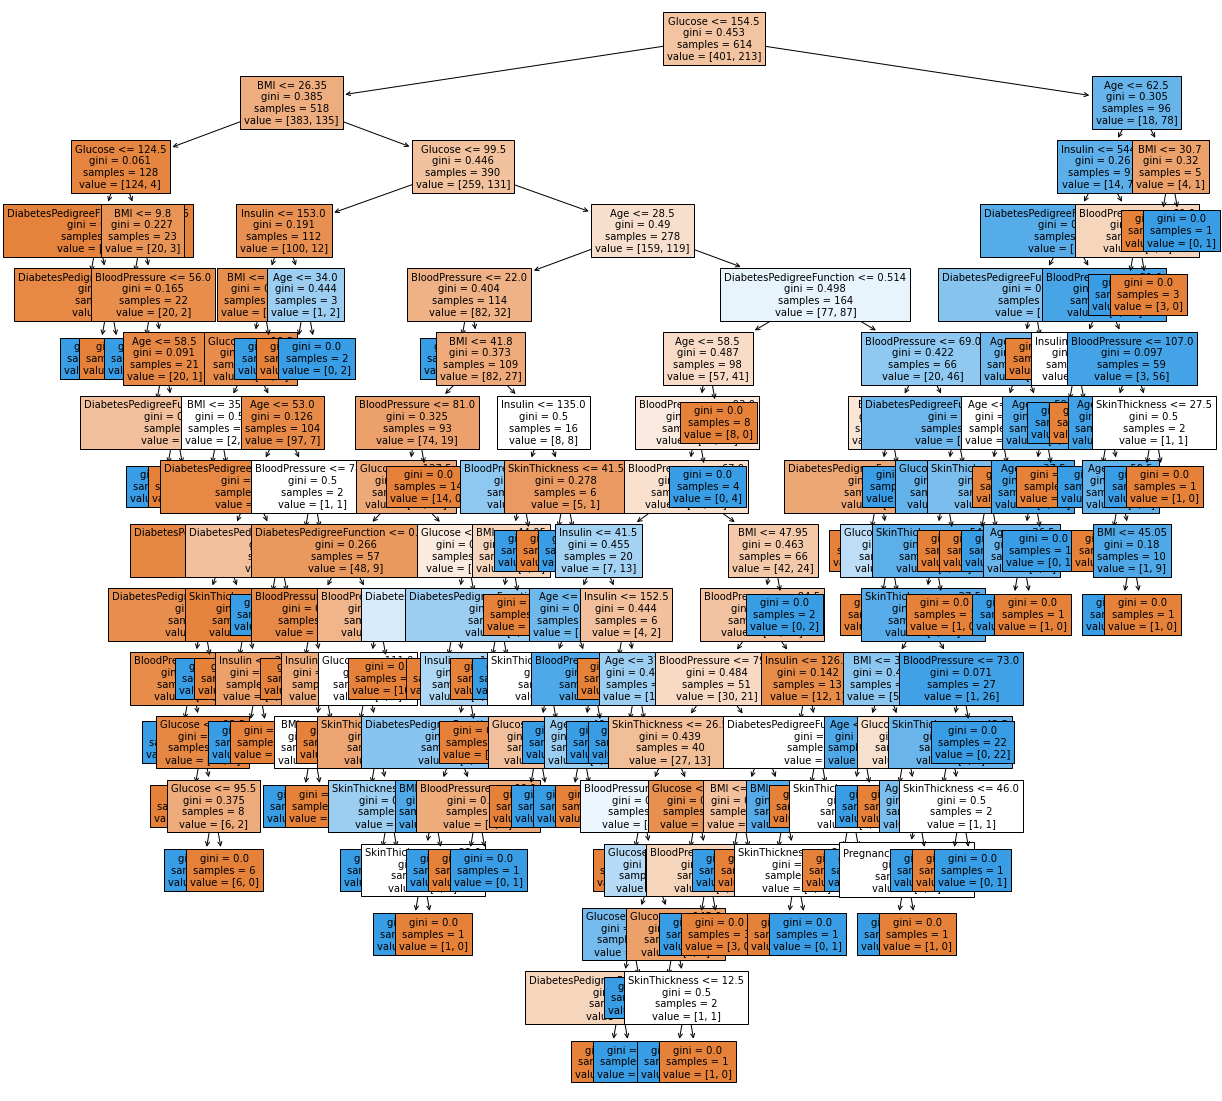

In [26]:
plt.figure(figsize=(20,20))
tree = plot_tree(model, feature_names=feature_names,
                filled=True,
                fontsize=10)

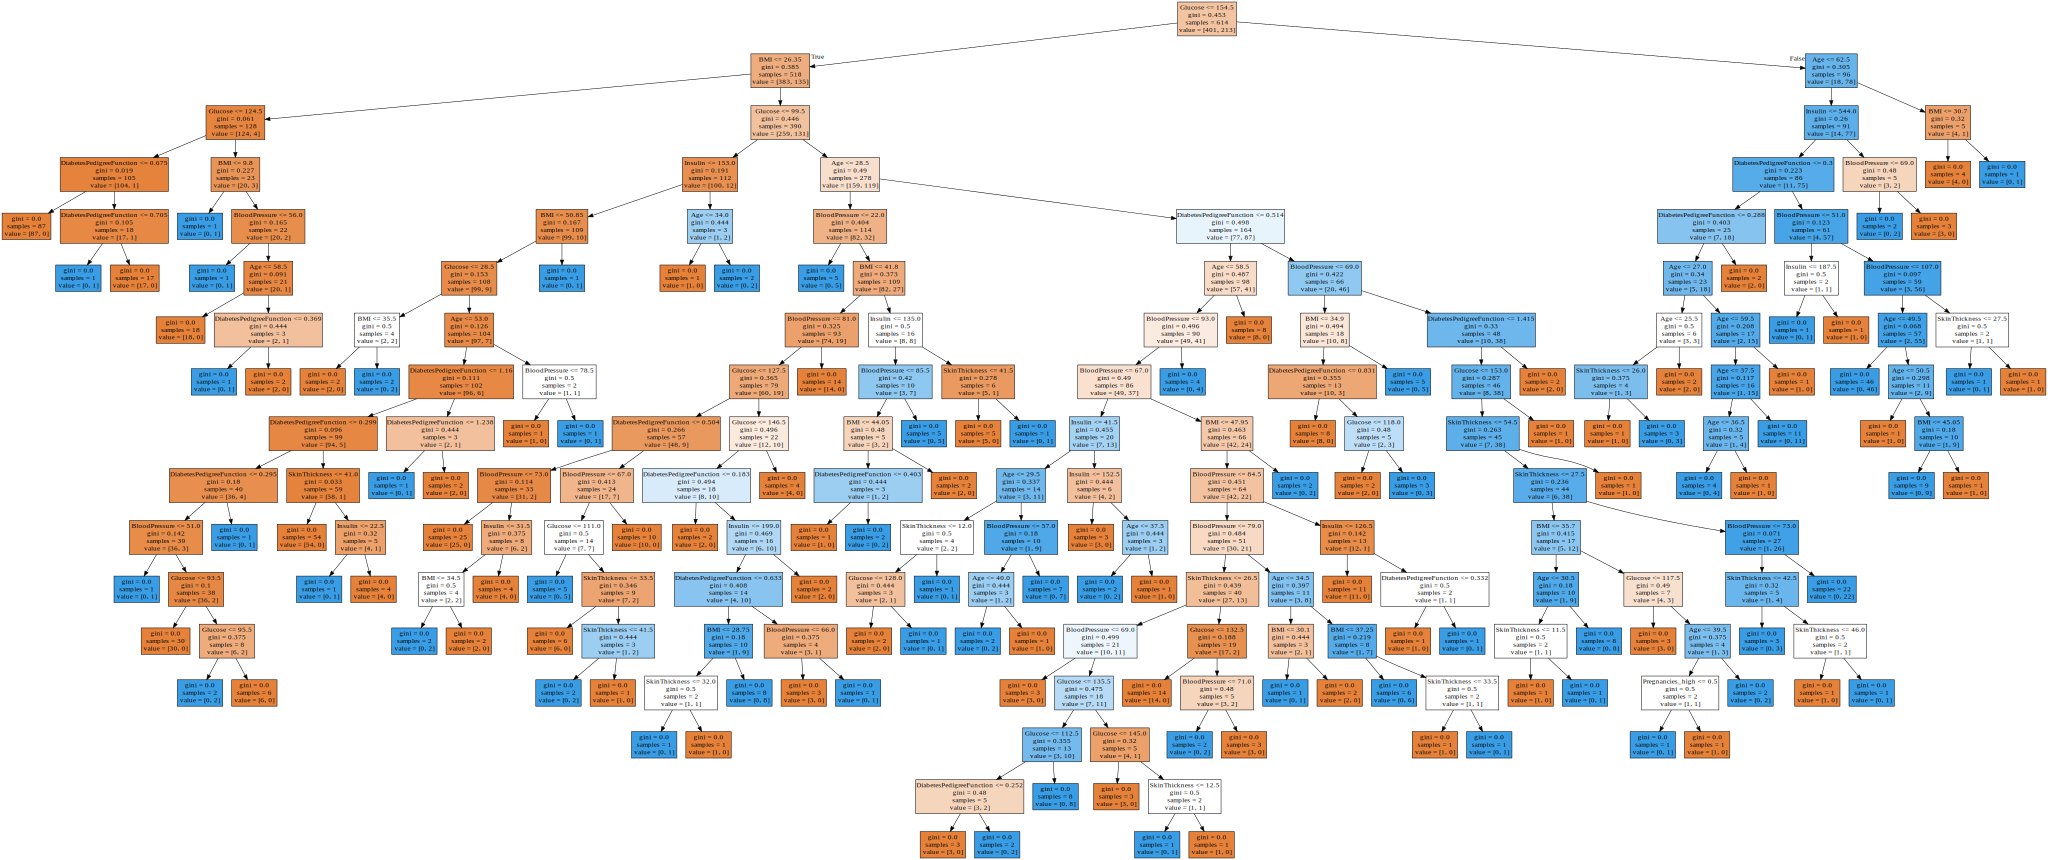

In [27]:
import graphviz
from sklearn.tree import export_graphviz

dot_tree = export_graphviz(model, feature_names= feature_names,filled=True)
graphviz.Source(dot_tree)

In [28]:
model.feature_importances_

array([0.3366311 , 0.1460782 , 0.072759  , 0.05554612, 0.15328256,
       0.11488223, 0.11722648, 0.0035943 ])

<AxesSubplot:>

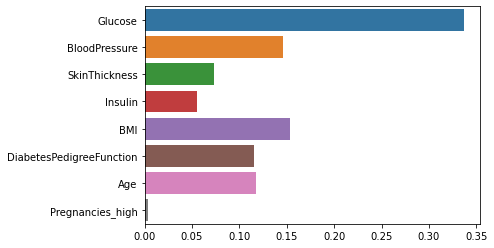

In [29]:
sns.barplot(x=model.feature_importances_, y=feature_names)

In [30]:
diff_count = abs(y_test-y_predict).sum()
diff_count

35

In [31]:
# 전체에서 22%를 틀렸음을 알 수 있음
abs(y_test-y_predict).sum() / len(y_test) * 100

22.727272727272727

In [33]:
# 예측도
(len(y_test)-diff_count) / len(y_test) * 100

77.27272727272727

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predict)

0.7077922077922078

In [29]:
model.score(X_test, y_test) * 100

70.77922077922078